In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
df = pd.read_csv('Reviews.csv.zip')

### EDA

In [3]:
df.shape

(568454, 10)

In [4]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
df['Score'] = df['Score'].replace({4: 5, 2: 1})

In [6]:
df['Score'].value_counts(normalize=True)

Score
5    0.780674
1    0.144316
3    0.075010
Name: proportion, dtype: float64

In [7]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [8]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
len(duplicate_reviews)

58040

We have 58,040 duplicate reviews. Let's see if they have the same User Id.

In [9]:
reviews_with_same_userIds = df[df.duplicated(subset=['Text', 'ProductId', 'UserId'], keep=False)]
len(reviews_with_same_userIds)

2122

Out of the 58,040 duplicates, 2,122 have the same User Id. Let's remove the duplicates after the first from the dataset

In [10]:
df = df.drop_duplicates(subset=['Text', 'ProductId', 'UserId'], keep='first')
df.shape

(567145, 10)

Let's also review how many of the duplicate reviews are over 100 words :

In [11]:
review_counts = df.Text.value_counts()
duplicate_reviews = review_counts[review_counts > 1]
duplicate_reviews = pd.Series(duplicate_reviews.index)
duplicates_with_over_100_words = duplicate_reviews.apply(lambda x: len(x.split()) > 100)
duplicates_with_over_100_words.sum()

14188

In [12]:
df[df.Text ==duplicate_reviews[0]]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
10836,10837,B0034KP00S,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
11237,11238,B001KVPC0G,A1TMAVN4CEM8U8,Gunner,0,1,5,1332288000,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
25447,25448,B0051TPWUI,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
43460,43461,B001EQ4P2I,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
43671,43672,B0049ZCF9G,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...
51470,51471,B004HOLD92,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 7th favorite flavor,Diamond Almonds<br />Almonds are a good source...
51754,51755,B0034KN2KS,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
56016,56017,B004HONIMC,A1TMAVN4CEM8U8,Gunner,0,1,5,1332288000,I prefer the flavored,Diamond Almonds<br />Almonds are a good source...
74233,74234,B00473PNGW,A1TMAVN4CEM8U8,Gunner,0,0,5,1336348800,My 9th favorite flavor,Diamond Almonds<br />Almonds are a good source...
78118,78119,B004MC0CNW,A1TMAVN4CEM8U8,Gunner,1,1,5,1331251200,My 3rd favorite flavor,Diamond Almonds<br />Almonds are a good source...


Out of the 58,002 remaning duplicates, 14,188 of the reviews have over 100 words.

In [13]:
df = df.loc[:,['ProductId','Text','Score']]

In [14]:
df.shape

(567145, 3)

In [15]:
df.isnull().sum()

ProductId    0
Text         0
Score        0
dtype: int64

We do not have missing values.

In [16]:
df.head(5)

,ProductId,Text,Score
0,B001E4KFG0,I have bought several of the Vitality canned d...,5
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,1
2,B000LQOCH0,This is a confection that has been around a fe...,5
3,B000UA0QIQ,If you are looking for the secret ingredient i...,1
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,5


In [17]:
df.sort_values('ProductId')

,ProductId,Text,Score
150513,0006641040,It's a great book with adorable illustrations....,5
150512,0006641040,I remembered this book from my childhood and g...,5
150514,0006641040,This book is a family favorite and was read to...,5
150515,0006641040,"The same author wrote ""Where the Wild Things A...",5
150516,0006641040,"Classic children's book, can't go wrong. I rea...",5
...,...,...,...
191720,B009UOFTUI,"This coffee supposedly is premium, it tastes w...",1
1477,B009UOFU20,"This coffee supposedly is premium, it tastes w...",1
328481,B009UUS05I,The basket was the perfect sympathy gift when ...,5
5702,B009WSNWC4,Purchased this product at a local store in NY ...,5


In [18]:
index_unique_prod = np.where(df.ProductId.value_counts().values == 1)[0].shape[0]

In [19]:
index_unique_prod

30416

In [20]:
len(set(df.ProductId)) - index_unique_prod

43842

We have 43842 products that has at least 2 reviews on the dataset.

In [21]:
np.where(df.ProductId.value_counts().values > 5)[0].shape[0]

17304

We have 17310 products on our dataset with more than 5 reviews.

In [22]:
np.where(df.ProductId.value_counts().values > 10)[0].shape[0]

9617

We have 9617 products on our dataset with more than 10 reviews.

In [23]:
np.where(df.ProductId.value_counts().values > 100)[0].shape[0]

843

We have 843 products on our dataset with more than 100 reviews.

In [24]:
nbr_reviews = [np.where(df.ProductId.value_counts().values > k)[0].shape[0] for k in range(10,1000,20)]

In [25]:
nbr_reviews

[9617,
 3021,
 1799,
 1249,
 968,
 744,
 597,
 516,
 411,
 320,
 266,
 223,
 202,
 171,
 140,
 117,
 101,
 93,
 89,
 69,
 65,
 56,
 56,
 37,
 30,
 27,
 25,
 18,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0]

(0.0, 5000.0)

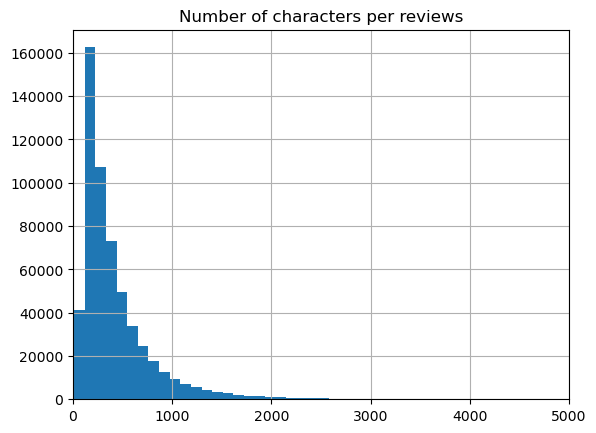

In [26]:
df.Text.str.len().hist(bins = 200)
plt.title('Number of characters per reviews')
plt.xlim(0,5000)

We can see that most of our reviews has less than 1000 characters. The majority of them has between 100 and 200 characters.

(0.0, 1000.0)

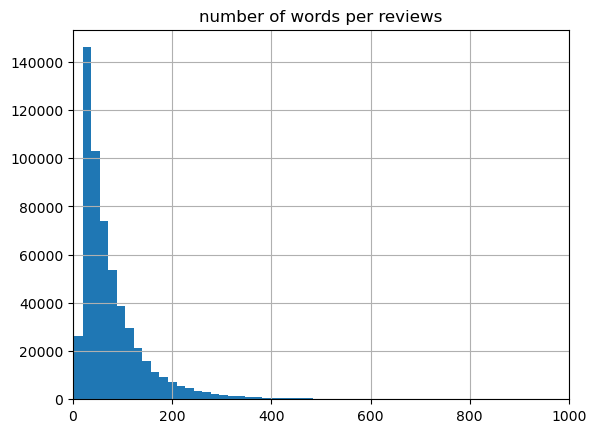

In [27]:
df.Text.str.split().map(lambda x : len(x)).hist(bins = 200)
plt.title('number of words per reviews')
plt.xlim(0,1000)

We can see that most of our reviews have less than 200 words. Most of them have around 40 words.

Text(0.5, 1.0, 'Average len of words per reviews')

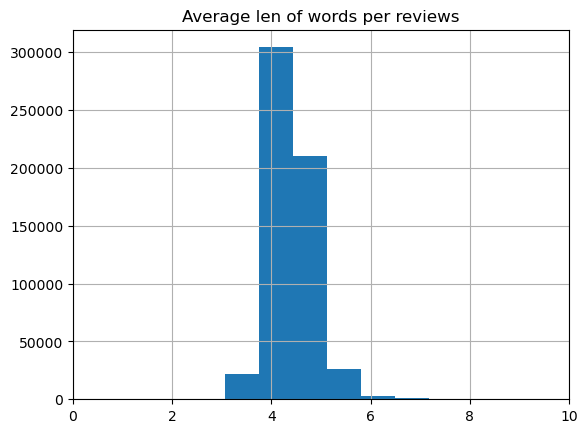

In [28]:
df.Text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x : np.mean(x)).hist(bins = 50)
plt.xlim(0,10)
plt.title('Average len of words per reviews')

We see that most of the reviews have a length of words between 3 and 6. This can be explained by the 'stop words' which are reducing the mean.

In [29]:
"""
## Needs to be removed
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

"""

"\n## Needs to be removed\nfrom nltk.corpus import stopwords\nnltk.download('stopwords')\nstop = set(stopwords.words('english'))\n\n"

In [30]:
from collections import defaultdict
new = df.Text.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i] # we get a list with all the words of all the reviews

dic = defaultdict(int)
for word in corpus:
    dic[word] +=1



<BarContainer object of 20 artists>

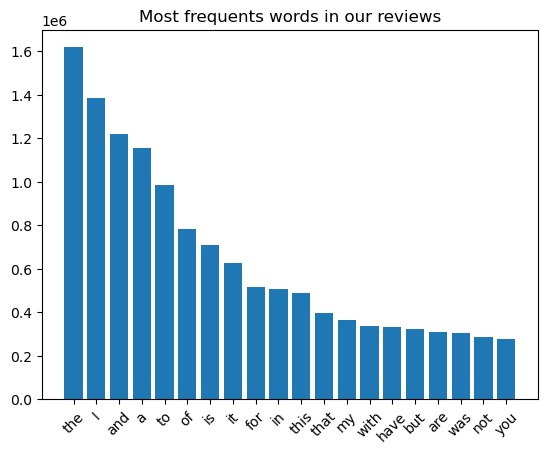

In [31]:
top = sorted(dic.items(), key = lambda x : x[1], reverse = True)[:20]
x,y = zip(*top)
plt.xticks(rotation = 45)
plt.title('Most frequents words in our reviews')
plt.bar(x,y)

We see how often are appearing stop words such as 'the','and',...

<Axes: >

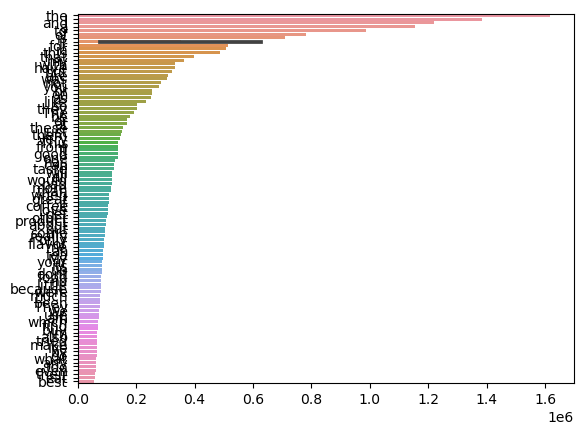

In [32]:
from collections import Counter
import re
counter = Counter(corpus)
most = counter.most_common()
x,y = [],[]
for word,count in most[:100]:
    clean_word = re.sub(r'[^\w\s]', '', word) # remove punctuation
    x.append(clean_word)
    y.append(count)

sns.barplot(x=y, y=x)



We see that we have a lot of positive words due to the fact that our dataset is imbalanced with a lot of good review with Words like 'good','great','love'.

In [33]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

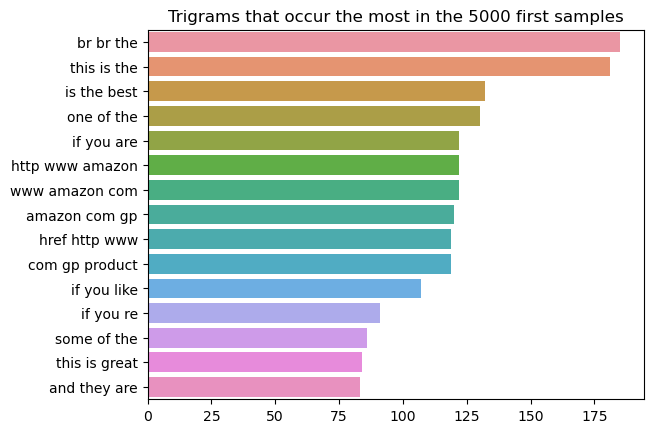

In [34]:
top_trigrams = get_top_ngram(df.Text.iloc[:5000], 3)
x,y = map(list,zip(*top_trigrams))
sns.barplot(x = y, y = x)
plt.title('Trigrams that occur the most in the 5000 first samples')
plt.show()

We see that we have a lot of reference to amazon and maybe the link of the product. We will see later why. We also have a lof of positive reviews patterns such as 'if you like', 'is the best', 'this is great'. We will have to do some data cleaning.

We split our data to train, validation and test using a groupshuffle to keep the same products on the same set.

In [35]:
from sklearn.model_selection import GroupShuffleSplit
splitter_temp = GroupShuffleSplit(test_size=.40, n_splits=1, random_state = 42)
split_temp = splitter_temp.split(df, groups=df['ProductId'])
train_inds, temp_inds = next(split_temp)

train = df.iloc[train_inds]
temp = df.iloc[temp_inds]



In [36]:
splitter_val = GroupShuffleSplit(test_size=.50, n_splits=1, random_state = 42)
split_val = splitter_val.split(temp, groups=temp['ProductId'])
val_inds, test_inds = next(split_val)

val = temp.iloc[val_inds]
test = temp.iloc[test_inds]

In [37]:
train.head()

,ProductId,Text,Score
0,B001E4KFG0,I have bought several of the Vitality canned d...,5
1,B00813GRG4,Product arrived labeled as Jumbo Salted Peanut...,1
3,B000UA0QIQ,If you are looking for the secret ingredient i...,1
4,B006K2ZZ7K,Great taffy at a great price. There was a wid...,5
5,B006K2ZZ7K,I got a wild hair for taffy and ordered this f...,5


In [38]:
train.shape,val.shape,test.shape

((333029, 3), (115658, 3), (118458, 3))

In [39]:
X_train = train.drop(columns = 'Score')
y_train = train.Score

X_val = val.drop(columns = 'Score')
y_val = val.Score

X_test = test.drop(columns = 'Score')
y_test = test.Score

##### Under-Sampling

In [40]:
df = df[:50000].copy()
df.shape

(50000, 3)

In [41]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['Score'])
y = df['Score']
groups = df['ProductId']


rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

group_split = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split the resampled data into training and testing sets
for train_index, test_index in group_split.split(X_resampled, y_resampled, groups=groups[y_resampled.index]):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

Name entity recognition :

In [42]:
! python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 435.7 kB/s eta 0:00:30
     --------------------------------------- 0.1/12.8 MB 469.7 kB/s eta 0:00:28
     --------------------------------------- 0.1/12.8 MB 722.1 kB/s eta 0:00:18
      -------------------------------------- 0.2/12.8 MB 958.4 kB/s eta 0:00:14
     - -------------------------------------- 0.4/12.8 MB 1.4 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 1.7 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/12.8 MB 2.1 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2.9 MB/s eta 0:00:05
     --- ------------------------------------ 1.3/12.8 MB 2.9 MB/s eta 0:00:04
     ------ --------------------------------- 2.2/12.8 MB 4.4 MB/s eta 0:00:03
     ------- -------------------------------- 2.4/12.8 MB 4.6 

In [43]:
import spacy
nlp = spacy.load('en_core_web_sm')


In [44]:
processed_reviews = []
for review in X_train.Text[:5]:
  doc = nlp(review)
  processed_reviews.append(doc)

In [45]:
for x in processed_reviews:
  print([(y.text,y.label_) for y in (x.ents)])

[('Quaker', 'ORG'), ('Albers', 'ORG'), ('Bob', 'PERSON'), ('Red Mill', 'ORG'), ('Gummy', 'PERSON'), ('3', 'CARDINAL'), ('the Food Bank', 'ORG')]
[('3 months', 'DATE')]
[('1', 'CARDINAL'), ('50 to 60 cents', 'MONEY'), ('1.18', 'MONEY'), ('2', 'CARDINAL'), ('Amazon', 'ORG'), ('2', 'CARDINAL'), ('future k-cup', 'ORG')]
[('first', 'ORDINAL'), ('30 minutes', 'TIME'), ('Tazo Passion', 'PRODUCT')]
[('B70', 'PRODUCT'), ('the Cafe Escapes', 'FAC'), ('the last half second', 'DATE'), ('Escape', 'PERSON'), ('10 minutes', 'TIME'), ('4', 'CARDINAL'), ('Nestle Quik', 'ORG')]


In [46]:
from spacy import displacy
for process_review in processed_reviews:
  displacy.render(process_review,style = 'ent')
  print('\n')

In [47]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents] # we just keep the labels

ent=X_train.Text[:100].apply(lambda x : ner(x)) # for each rows we get a list of labels
ent=[x for sub in ent for x in sub] # we get a single list with all the labels of all the rows

counter=Counter(ent)
count=counter.most_common()

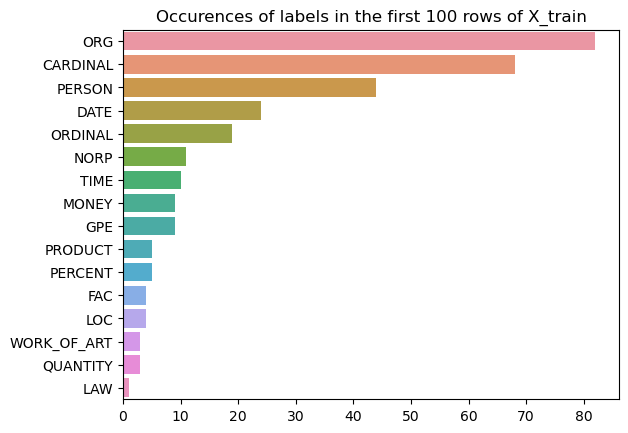

In [48]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)
plt.title('Occurences of labels in the first 100 rows of X_train')
plt.show()

We see that on reviews, we have a lof of companies that are stated, probably corresponding to the company that is selling the product.

In [49]:
def ner_label(text,ent):
  doc = nlp(text)
  return [X.text for X in doc.ents if X.label_ == ent]



<Axes: title={'center': 'Companies that are stated in the first 1000 reviews of the train set'}>

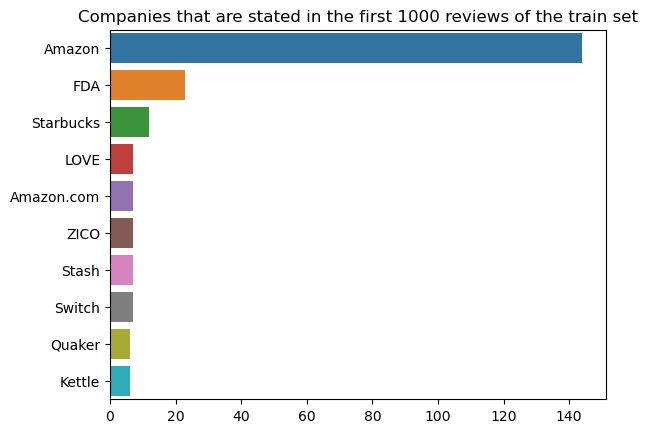

In [50]:
org = X_train.Text[:1000].apply(lambda x :ner_label(x,'ORG'))
org = [i for x in org for i in x]
counter = Counter(org)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Companies that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'Cardinality that is stated in the first 1000 reviews of the train set'}>

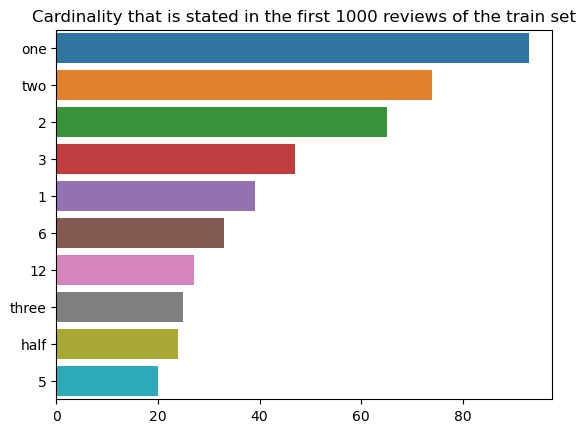

In [51]:
card = X_train.Text[:1000].apply(lambda x :ner_label(x,'CARDINAL'))
card = [i for x in card for i in x]
counter = Counter(card)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('Cardinality that is stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

<Axes: title={'center': 'People or brand that are stated in the first 1000 reviews of the train set'}>

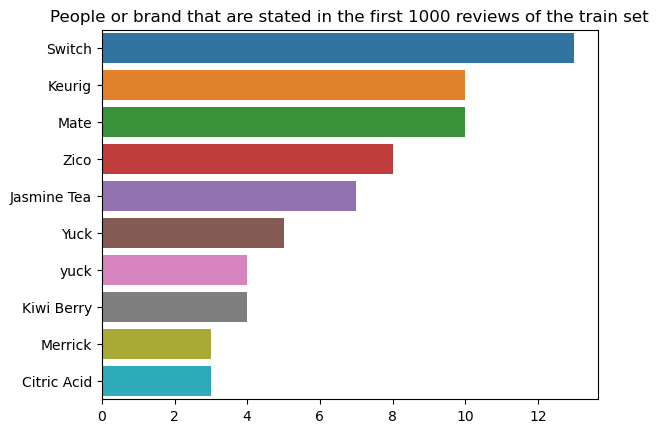

In [52]:
person = X_train.Text[:1000].apply(lambda x :ner_label(x,'PERSON'))
person = [i for x in person for i in x]
counter = Counter(person)
x,y = map(list,zip(*counter.most_common(10)))
plt.title('People or brand that are stated in the first 1000 reviews of the train set')
sns.barplot(x = y,y = x)

In [53]:
! pip install contractions

#### Preprocessing

In [54]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from tqdm import tqdm
import contractions
import string
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_news(df):
  ### function to clean each review
    corpus=[]
    lem=WordNetLemmatizer()
    for review in tqdm(df.Text, desc = 'preprocessing'):
        review = contractions.fix(review) # it removes all contractions (i'm -> i am)
        clean_words = []
        for w in word_tokenize(review): # each review is converted to a list of words. We do not have punctuations in the word (it is great, but -> 'it','is','great','but')
            no_punct = [char for char in w if char not in string.punctuation and not char.isdigit()]
            words_wo_punct = ''.join(no_punct).lower()
            words_wo_punct = lem.lemmatize(words_wo_punct)  # lemmatize : reduce each word into a common base (cats -> cat) based on the dictionary form
            clean_words.append(words_wo_punct)

        corpus.append(clean_words)

    return corpus

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
corpus = preprocess_news(X_train[:50000]) # we get a list of each words preprocessed of each reviews

preprocessing: 100%|██████████████████████████████████████████████████████████████| 9646/9646 [00:09<00:00, 989.06it/s]


In [56]:
from itertools import chain
all_words_cleaned = list(chain.from_iterable(corpus))

In [57]:
Counter(all_words_cleaned).most_common(20)

[('', 155708),
 ('the', 36718),
 ('i', 32035),
 ('a', 26759),
 ('and', 21851),
 ('it', 20891),
 ('to', 18587),
 ('is', 16958),
 ('of', 15416),
 ('not', 14587),
 ('br', 12656),
 ('this', 12297),
 ('in', 9705),
 ('for', 9670),
 ('that', 9044),
 ('but', 8156),
 ('my', 7582),
 ('have', 7418),
 ('wa', 7400),
 ('are', 6413)]

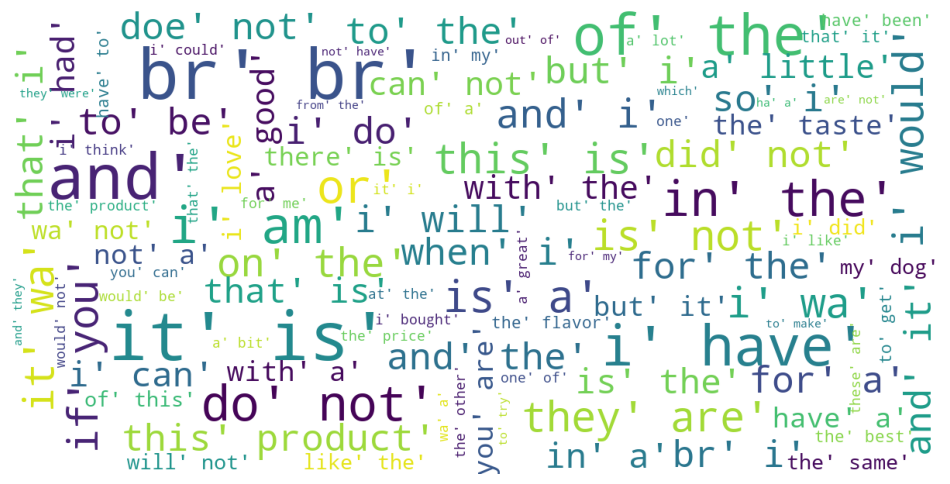

In [58]:
from wordcloud import WordCloud

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data)) # generates the wordcloud based on text

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

#### Model

##### Unsupervised learning

In [59]:
import gensim
dic=gensim.corpora.Dictionary(corpus) # assign an id to each unique word of corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus] # we create a bag of words. We have a list of tuples for each row with (ID of the word, occurences of the word)

In [60]:
bow_corpus

[[(0, 9),
  (1, 3),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 2),
  (6, 2),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 2),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 5),
  (50, 1),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1)],
 [(0, 4),
  (49, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)],
 [(0, 18),
  (1, 1),
  (12, 1),
  (28, 2),
  (36, 1),
  (38, 1),
  (42, 1),
  (49, 2),
  (51, 3),
  (52, 2),
  (64, 2),
  (73, 1),
  (77, 1)

In [61]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 5,
                                   id2word = dic,
                                   passes = 5,
                                   workers = 2) # We use LDAMulticore as we have a large dataset ( it parallelizes the process)
# LDA models are used to get the main topics of our data.
# For each topic, we get the top words and the probability for this word to appear in the given topic
# based on all the possible words of this topic
lda_model.show_topics()

[(0,
  '0.129*"" + 0.046*"the" + 0.030*"i" + 0.029*"a" + 0.025*"and" + 0.022*"is" + 0.016*"it" + 0.016*"of" + 0.014*"to" + 0.012*"this"'),
 (1,
  '0.082*"" + 0.049*"i" + 0.032*"coffee" + 0.030*"the" + 0.024*"wa" + 0.023*"a" + 0.023*"and" + 0.021*"to" + 0.020*"it" + 0.018*"this"'),
 (2,
  '0.147*"" + 0.036*"i" + 0.028*"a" + 0.028*"not" + 0.024*"it" + 0.023*"the" + 0.019*"you" + 0.018*"to" + 0.013*"of" + 0.012*"is"'),
 (3,
  '0.198*"" + 0.031*"the" + 0.027*"a" + 0.025*"i" + 0.023*"br" + 0.022*"and" + 0.019*"it" + 0.017*"is" + 0.016*"to" + 0.016*"of"'),
 (4,
  '0.103*"" + 0.034*"the" + 0.034*"i" + 0.026*"it" + 0.026*"to" + 0.025*"and" + 0.024*"a" + 0.016*"is" + 0.015*"my" + 0.012*"of"')]

We get 5 main topics :
-  one seems to be about dog food
-  one seams to be about tea and drinks
-  one seems to be about food with chocolate
-  one seems to be about coffee with a chocolate flavor maybe
- one seems to be about snackfood such as chips

We see that many positive words are very frequent in the dataset such as 'delicious', 'love', 'good',...
we also have many words from fooding products such as 'flavor','taste','ingredients',...

In [62]:
perplexity = lda_model.log_perplexity(bow_corpus)
perplexity

-5.892898332770937

In [63]:
from gensim.models.coherencemodel import CoherenceModel
coherence_model = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Coherence Score: 0.30541453091665977


##### supervised learning

In [64]:
y_corpus = y_train[:50000]

In [65]:
from scipy.sparse import csr_matrix
from sklearn.linear_model import LinearRegression

rows, cols, data = [], [], []
for i, document in enumerate(bow_corpus):
    for word_index, word_count in document:
        rows.append(i)
        cols.append(word_index)
        data.append(word_count)

# Create a sparse matrix
num_docs = len(bow_corpus)
num_words = len(set(cols))
X_sparse = csr_matrix((data, (rows, cols)), shape=(num_docs, num_words))
# it creates a matrix where features are each words and each rows corresponds to a review


In [66]:
X_sparse.shape

(9646, 19252)

We have too many features. We need to proceed to feature selection. We remove features that have less than 100 non zeros values.

In [67]:
threshold = 100
non_zero_counts = X_sparse.getnnz(axis=0) # we get an array with the number of zeros per column
columns_to_keep = (non_zero_counts >= threshold).reshape(-1)
X_sparse_filtered = X_sparse[:, columns_to_keep]
X_sparse_filtered = csr_matrix(X_sparse_filtered)

In [68]:
X_sparse_filtered.shape

(9646, 779)

In [69]:
y_corpus.head

<bound method NDFrame.head of 38898    1
18358    1
25826    1
27366    1
40248    1
        ..
44013    5
17280    5
17317    5
10063    5
19258    5
Name: Score, Length: 9646, dtype: int64>

In [70]:
X_sparse_filtered.toarray()

array([[ 9,  3,  1, ...,  0,  0,  0],
       [ 4,  0,  0, ...,  0,  0,  0],
       [18,  1,  0, ...,  0,  0,  0],
       ...,
       [ 8,  1,  0, ...,  0,  0,  0],
       [ 8,  0,  0, ...,  0,  0,  0],
       [10,  1,  1, ...,  0,  0,  0]], dtype=int32)

###### logisticregression

In [71]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_sparse_filtered, y_corpus, test_size=0.2, random_state=42)

# Choose a model (e.g., Linear Regression)
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

class_report_lr = classification_report(y_test,y_pred)
print(class_report_lr)

              precision    recall  f1-score   support

           1       0.68      0.64      0.66       661
           3       0.58      0.58      0.58       639
           5       0.71      0.75      0.73       630

    accuracy                           0.65      1930
   macro avg       0.65      0.66      0.65      1930
weighted avg       0.65      0.65      0.65      1930



C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


We get an accuracy of 0.65 for our baseline model. - worse results

###### knn

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           1       0.44      0.50      0.47       661
           3       0.43      0.40      0.42       639
           5       0.53      0.49      0.51       630

    accuracy                           0.46      1930
   macro avg       0.47      0.46      0.46      1930
weighted avg       0.47      0.46      0.46      1930



We get worse results : accuracy of 0.46 and precisions and recalls are considered low for the Negative and Neutral.

###### dummyclassifier

In [73]:
from sklearn.dummy import DummyClassifier
strat = ['most_frequent','prior','stratified','uniform']
for strategy in strat:
    dummy_clf = DummyClassifier(strategy = strategy)
    dummy_clf.fit(X_train,y_train)
    y_pred_dumm = dummy_clf.predict(X_test)
    print(f'Strategy = {strategy} : ')
    print(classification_report(y_test,y_pred_dumm))
    print('\n')

Strategy = most_frequent : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       661
           3       0.00      0.00      0.00       639
           5       0.33      1.00      0.49       630

    accuracy                           0.33      1930
   macro avg       0.11      0.33      0.16      1930
weighted avg       0.11      0.33      0.16      1930



Strategy = prior : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       661
           3       0.00      0.00      0.00       639
           5       0.33      1.00      0.49       630

    accuracy                           0.33      1930
   macro avg       0.11      0.33      0.16      1930
weighted avg       0.11      0.33      0.16      1930



Strategy = stratified : 
              precision    recall  f1-score   support

           1       0.36      0.36      0.36       661
           3       0.34      0.34      0.34       63

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\

In [74]:
models_results = {
    'LogisticRegression':list(classification_report(y_test,y_pred)),
    'KNN' : list(classification_report(y_test,y_pred_knn))
}
table_of_result = pd.DataFrame(models_results).transpose()
table_of_result

,0,1,2,3,4,5,6,7,8,9,...,370,371,372,373,374,375,376,377,378,379
LogisticRegression,,,,,,,,,,,...,,,,,,1,9,3,0,\n
KNN,,,,,,,,,,,...,,,,,,1,9,3,0,\n
